In [3]:
## 이슈 작업 : 다이소 및 이마트 등 강아지 용품점으로 나옴 / 사람 약국이 동물 약국으로 표기됨.

In [4]:
import pandas as pd
import numpy as np

In [5]:
test = pd.read_csv('1.CSV')

In [6]:
test.isnull().sum()

시설명             21867
카테고리1           21867
카테고리2           21867
카테고리3           21867
시도 명칭           21867
시군구 명칭          21867
법정읍면동명칭         21867
리 명칭            23929
번지              21867
도로명 이름          21868
건물 번호           21868
위도              21867
경도              21867
우편번호            21867
도로명주소           21868
지번주소            21867
전화번호            21867
홈페이지            21867
휴무일             21867
운영시간            21867
주차 가능여부         21867
입장(이용료)가격 정보    21867
반려동물 동반 가능정보    21867
반려동물 전용 정보      21867
입장 가능 동물 크기     21867
반려동물 제한사항       21867
장소(실내) 여부       21867
장소(실외)여부        21867
기본 정보_장소설명      21867
애견 동반 추가 요금     21867
최종작성일           21867
dtype: int64

In [7]:
test.columns

Index(['시설명', '카테고리1', '카테고리2', '카테고리3', '시도 명칭', '시군구 명칭', '법정읍면동명칭', '리 명칭',
       '번지', '도로명 이름', '건물 번호', '위도', '경도', '우편번호', '도로명주소', '지번주소', '전화번호',
       '홈페이지', '휴무일', '운영시간', '주차 가능여부', '입장(이용료)가격 정보', '반려동물 동반 가능정보',
       '반려동물 전용 정보', '입장 가능 동물 크기', '반려동물 제한사항', '장소(실내) 여부', '장소(실외)여부',
       '기본 정보_장소설명', '애견 동반 추가 요금', '최종작성일'],
      dtype='object')

In [8]:
temp = test.copy()

In [9]:
temp = temp[['시설명', '카테고리1', '카테고리2', '카테고리3', '시도 명칭', '시군구 명칭', '법정읍면동명칭','위도', '경도','반려동물 동반 가능정보']]

In [10]:
temp.head()

,시설명,카테고리1,카테고리2,카테고리3,시도 명칭,시군구 명칭,법정읍면동명칭,위도,경도,반려동물 동반 가능정보
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
temp2 = temp.rename(columns={'시설명':'Company',
                             '카테고리1': 'Category1',
                             '카테고리2' : 'Category2',
                             '카테고리3': 'Category3',
                             '시도 명칭' : 'City',
                             '시군구 명칭' : 'Gu',
                             '법정읍면동명칭':'Dong',
                             '위도' : 'Y',
                             '경도' : 'X',
                             '반려동물 동반 가능정보':'accompany'})

In [12]:
temp2 = temp2.dropna()

In [13]:
temp3 = temp2[temp2['accompany'].str.contains('가능')].copy()
temp3 = temp3[temp3['City'].str.contains('서울')]

In [14]:
# null 위치 행 위치 찾기.
null_rows = temp3[temp3.isnull().any(axis=1)].copy
null_rows

<bound method NDFrame.copy of Empty DataFrame
Columns: [Company, Category1, Category2, Category3, City, Gu, Dong, Y, X, accompany]
Index: []>

In [15]:
# null값 제거
temp3 = temp3.dropna()

In [ ]:
# 약국  -----------------
uniq_pharmacy = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_pharmacy = uniq_pharmacy[uniq_pharmacy['Category3'].str.contains('약국')]
uniq_pharmacy['Counts'] = uniq_pharmacy.groupby(['Gu','Dong']).transform('size')
uniq_pharmacy['Y'] = uniq_pharmacy.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_pharmacy['X'] = uniq_pharmacy.groupby(['Gu','Dong'])['X'].transform('median')
# 카피
uniq_pharmacy_Count = uniq_pharmacy.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
# 동물 약국
Animal_pharmacy_Count = uniq_pharmacy_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_pharmacy_Count
temp3.columns
temp3['Category3'].unique()

In [ ]:
# 카페 작업 -----------------
uniq_Cafe = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_Cafe = uniq_Cafe[uniq_Cafe['Category3'].str.contains('카페')]
uniq_Cafe['Counts'] = uniq_Cafe.groupby(['Gu','Dong']).transform('size')
uniq_Cafe['Y'] = uniq_Cafe.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_Cafe['X'] = uniq_Cafe.groupby(['Gu','Dong'])['X'].transform('median')
# 카피
uniq_Cafe_Count = uniq_Cafe.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_Cafe_Count.head()
# 카페
Animal_Cafe_Count = uniq_Cafe_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_Cafe_Count
temp3.columns
temp3['Category3'].unique()

In [ ]:
# 병원 작업 -----------------
uniq_Hospital = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_Hospital = uniq_Hospital[uniq_Hospital['Category3'].str.contains('병원')]
uniq_Hospital['Counts'] = uniq_Hospital.groupby(['Gu','Dong']).transform('size')
uniq_Hospital['Y'] = uniq_Hospital.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_Hospital['X'] = uniq_Hospital.groupby(['Gu','Dong'])['X'].transform('median')
# 카피
uniq_Hospital_Count = uniq_Hospital.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_Hospital_Count.head()
# 병원
Animal_Hospital_Count = uniq_Hospital_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_Hospital_Count
temp3['Category3'].unique()

In [ ]:
# 미용 작업 -----------------
uniq_beauty = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_beauty = uniq_beauty[uniq_beauty['Category3'].str.contains('미용')]
uniq_beauty['Counts'] = uniq_beauty.groupby(['Gu','Dong']).transform('size')
uniq_beauty['Y'] = uniq_beauty.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_beauty['X'] = uniq_beauty.groupby(['Gu','Dong'])['X'].transform('median')
# 카피
uniq_beauty_Count = uniq_beauty.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_beauty_Count.head()
# 미용
Animal_beauty_Count = uniq_beauty_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_beauty_Count


In [43]:
temp3['Category3'].unique()

array(['카페', '동물병원', '미용', '반려동물용품', '위탁관리'], dtype=object)

In [ ]:
# 반려동물 용품 작업 -----------------
uniq_store = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_store = uniq_store[uniq_store['Category3'].str.contains('용품')]
uniq_store['Counts'] = uniq_store.groupby(['Gu','Dong']).transform('size')
uniq_store['Y'] = uniq_store.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_store['X'] = uniq_store.groupby(['Gu','Dong'])['X'].transform('median')
# 카피
uniq_store_Count = uniq_store.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_store_Count.head()
# 용품
Animal_Store_Count = uniq_store_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_Store_Count

temp3['Category3'].unique()

In [ ]:
# 반려동물 용품 작업 -----------------
uniq_Hotel = temp3[['Gu', 'Dong','Category1', 'Category2', 'Category3','Y', 'X']].copy()
uniq_Hotel = uniq_Hotel[uniq_Hotel['Category3'].str.contains('위탁')]
uniq_Hotel['Counts'] = uniq_Hotel.groupby(['Gu','Dong']).transform('size')
uniq_Hotel['Y'] = uniq_Hotel.groupby(['Gu','Dong'])['Y'].transform('median')
uniq_Hotel['X'] = uniq_Hotel.groupby(['Gu','Dong'])['X'].transform('median')
# 카피
uniq_Hotel_Count = uniq_Hotel.drop_duplicates(subset=['Gu','Dong'], keep='first').reset_index(drop=True).copy()
uniq_Hotel_Count.head()

In [56]:
# 위탁관리
Animal_Hotel_Count = uniq_Hotel_Count.sort_values(by = ['Gu','Dong'], ascending=True).reset_index(drop=True).copy()
Animal_Hotel_Count

,Gu,Dong,Category1,Category2,Category3,Y,X,Counts
0,강남구,대치동,반려동물업,반려동물 서비스,위탁관리,37.505090,127.059404,1
1,강남구,역삼동,반려동물업,반려동물 서비스,위탁관리,37.499331,127.042877,1
2,강서구,화곡동,반려동물업,반려동물 서비스,위탁관리,37.554614,126.850714,1
3,관악구,신림동,반려동물업,반려동물 서비스,위탁관리,37.488656,126.928064,1
4,서초구,반포동,반려동물업,반려동물 서비스,위탁관리,37.498507,126.999386,1
5,송파구,송파동,반려동물업,반려동물 서비스,위탁관리,37.509709,127.105706,1


In [57]:
"""
import folium

# 함수 정의
def add_markers_to_map(dataframe, map_folium, color):
    for index, row in dataframe.iterrows():
        popup = folium.Popup(row['Category3'], max_width=200)
        folium.CircleMarker(location=[row['Y'], row['X']], popup=popup, color=color, fill=True, fill_color=color, fill_opacity=1, radius=3).add_to(map_folium)

# 지도 생성
map_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles='CartoDB dark_matter')

# 각 데이터프레임에 따라 마커 추가
add_markers_to_map(Animal_pharmacy_Count, map_folium, 'green')
add_markers_to_map(Animal_Cafe_Count, map_folium, 'purple')
add_markers_to_map(Animal_Hospital_Count, map_folium, 'orange')
add_markers_to_map(Animal_beauty_Count, map_folium, 'darkred')
add_markers_to_map(Animal_Store_Count, map_folium, 'pink')

# 레이어 컨트롤(고정된 범례) 추가
folium.LayerControl().add_to(map_folium)

# 지도 출력
#map_folium
# map_folium.save("map_with_legend.html")
"""

'\nimport folium\n\n# 함수 정의\ndef add_markers_to_map(dataframe, map_folium, color):\n    for index, row in dataframe.iterrows():\n        popup = folium.Popup(row[\'Category3\'], max_width=200)\n        folium.CircleMarker(location=[row[\'Y\'], row[\'X\']], popup=popup, color=color, fill=True, fill_color=color, fill_opacity=1, radius=3).add_to(map_folium)\n\n# 지도 생성\nmap_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles=\'CartoDB dark_matter\')\n\n# 각 데이터프레임에 따라 마커 추가\nadd_markers_to_map(Animal_pharmacy_Count, map_folium, \'green\')\nadd_markers_to_map(Animal_Cafe_Count, map_folium, \'purple\')\nadd_markers_to_map(Animal_Hospital_Count, map_folium, \'orange\')\nadd_markers_to_map(Animal_beauty_Count, map_folium, \'darkred\')\nadd_markers_to_map(Animal_Store_Count, map_folium, \'pink\')\n\n# 레이어 컨트롤(고정된 범례) 추가\nfolium.LayerControl().add_to(map_folium)\n\n# 지도 출력\n#map_folium\n# map_folium.save("map_with_legend.html")\n'

In [ ]:
merged_df = pd.concat([Animal_Store_Count, Animal_Hospital_Count, Animal_Cafe_Count, Animal_beauty_Count, Animal_Hotel_Count], axis=0)
merged_df.rename(columns={'Category3': 'Category'}, inplace=True)
merged_df.columns
Merge_Location = merged_df[['Gu', 'Dong','Category', 'Y', 'X', 'Counts']].copy()
Merge_Location

# 저장

In [64]:
Merge_Location.to_csv('Animal_Location_merged_df.csv',index=False)

In [65]:
"""
def summarize_facility_counts(df, group_col):
    return df.groupby(group_col).agg({'Counts': 'sum'}).reset_index()

Gu_Facility_Store = summarize_facility_counts(Animal_Store_Count, 'Gu')
Gu_Facility_Hosipital = summarize_facility_counts(Animal_Hospital_Count, 'Gu')
Gu_Facility_Cafe = summarize_facility_counts(Animal_Cafe_Count, 'Gu')
Gu_Facility_Beauty = summarize_facility_counts(Animal_beauty_Count, 'Gu')
Gu_Facility_Hotel = summarize_facility_counts(Animal_Hotel_Count, 'Gu')"""

"\ndef summarize_facility_counts(df, group_col):\n    return df.groupby(group_col).agg({'Counts': 'sum'}).reset_index()\n\nGu_Facility_Store = summarize_facility_counts(Animal_Store_Count, 'Gu')\nGu_Facility_Hosipital = summarize_facility_counts(Animal_Hospital_Count, 'Gu')\nGu_Facility_Cafe = summarize_facility_counts(Animal_Cafe_Count, 'Gu')\nGu_Facility_Beauty = summarize_facility_counts(Animal_beauty_Count, 'Gu')\nGu_Facility_Hotel = summarize_facility_counts(Animal_Hotel_Count, 'Gu')"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Gu_Dong_Pet_Business = pd.read_csv('EDA_boxplot_.csv')
Seoul_Gu_Dong_Pet_Business_Population = pd.read_csv('EDA_Boxplot2_v2_.csv')

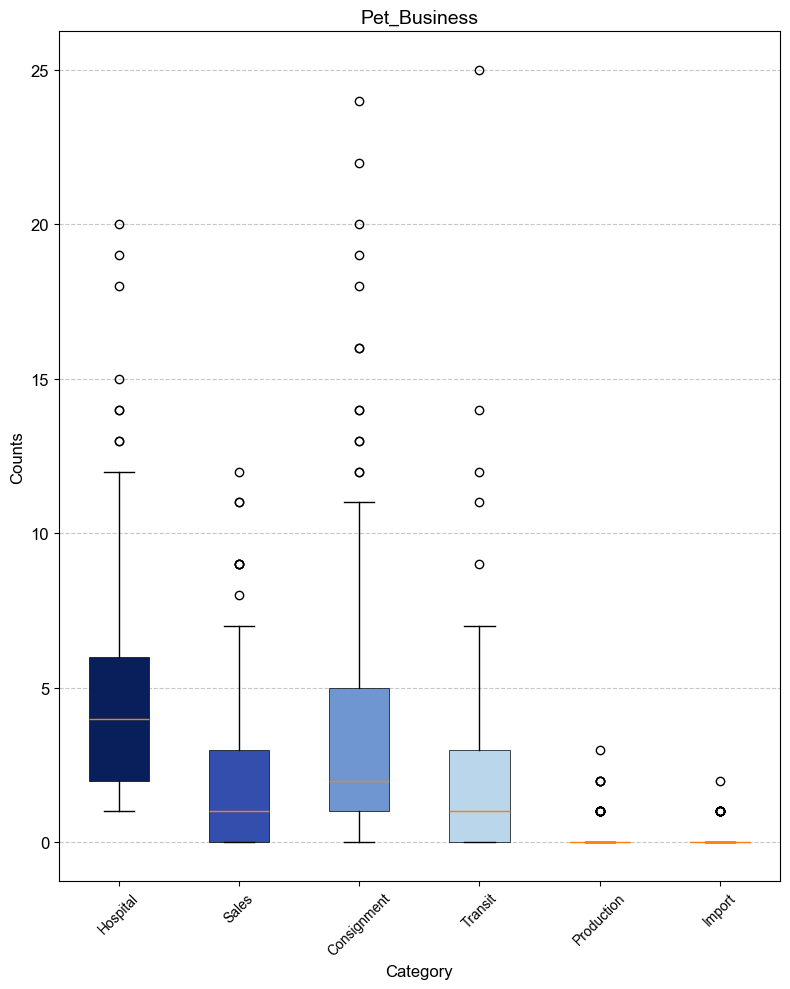

In [ ]:

# X 축: Gu, Y 축: 업종
plt.figure(figsize=(8, 10), facecolor='white')  # 용지의 배경색을 변경하려면 facecolor를 설정합니다.
bp = plt.boxplot([Gu_Dong_Pet_Business['Hospital_Counts'],
             Gu_Dong_Pet_Business['Sales_Counts'],
             Gu_Dong_Pet_Business['Consignment_Counts'],
             Gu_Dong_Pet_Business['Transit_Counts'],
             Gu_Dong_Pet_Business['Production_Counts'],
             Gu_Dong_Pet_Business['Import_Counts']],
             labels=['Hospital', 'Sales', 'Consignment', 'Transit', 'Production', 'Import'], patch_artist=True)

colors = ['#081F5C', '#334EAC', '#7096D1', '#BAD6EB', '#D0E3FF', '#FFF9F0']  # 원하는 색상으로 변경 가능

for box, color in zip(bp['boxes'], colors):
    # 박스 색상 설정
    box.set(color='black', linewidth=0.5)  # 테두리 색상과 두께
    box.set(facecolor=color)  # 박스 내부 색상 설정

plt.xlabel('Category', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Pet_Business', fontsize=14)
plt.xticks(rotation=45) 
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # 그리드 추가
plt.tight_layout()

plt.savefig('Pet_Business.png', dpi=300, bbox_inches='tight')

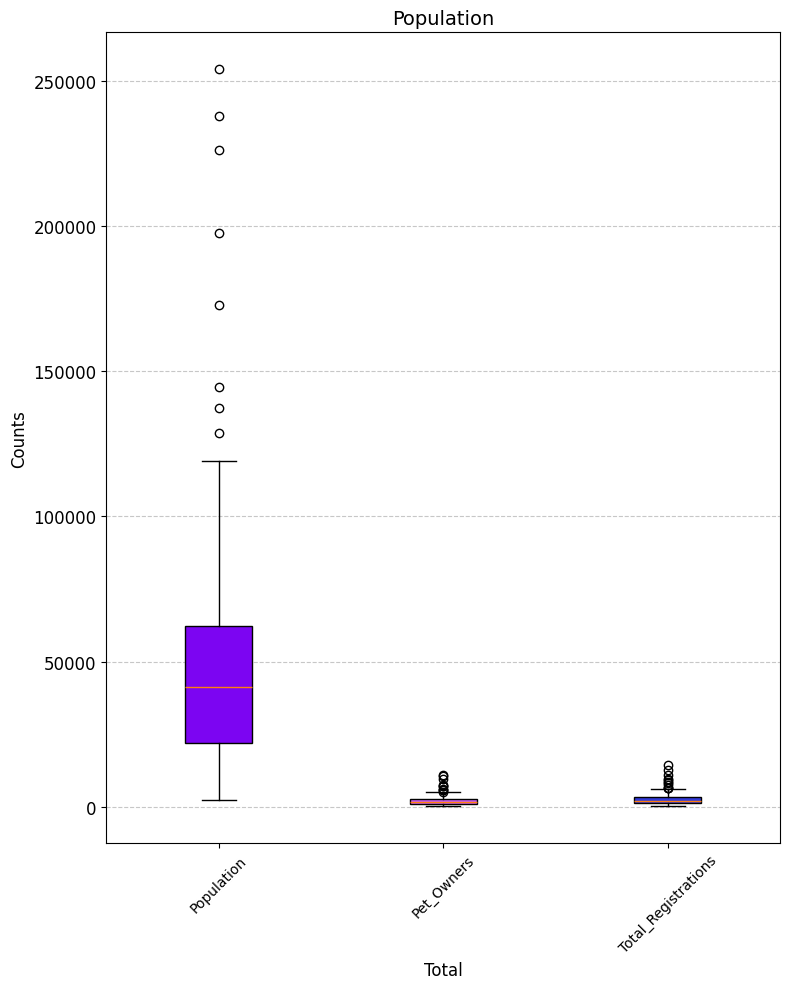

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# X 축: 구, Y 축: 업종
plt.figure(figsize=(8, 10))
bp = plt.boxplot([Seoul_Gu_Dong_Pet_Business_Population['Population'],
             Seoul_Gu_Dong_Pet_Business_Population['Pet_Owners'],
             Seoul_Gu_Dong_Pet_Business_Population['Total_Registrations']],
             labels=['Population', 'Pet_Owners', 'Total_Registrations'], patch_artist=True)

colors = ['#7C05F2', '#C55CF2', '#323AD9']  # 각 열에 대한 원하는 색상을 리스트로 지정합니다.

for box, color in zip(bp['boxes'], colors):
    # 박스 색상 설정
    box.set(color='black', linewidth=1)  # 테두리 색상과 두께
    box.set(facecolor=color)  # 박스 내부 색상 설정

plt.xlabel('Total', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Population', fontsize=14)
plt.xticks(rotation=45) 
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # 그리드 추가
plt.tight_layout()
plt.savefig('Population_Pet_Owners_Total_Registrations.png', dpi=300, bbox_inches='tight')

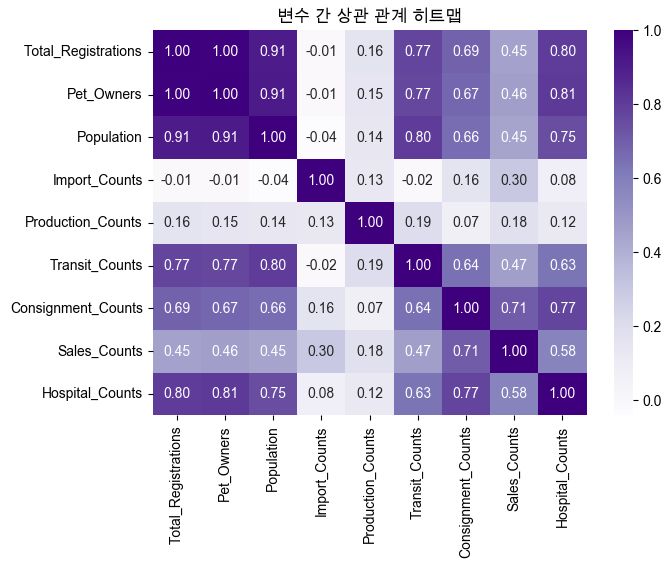

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pairplot = Seoul_Gu_Dong_Pet_Business_Population[['Total_Registrations', 'Pet_Owners', 'Population',
                                                      'Import_Counts', 'Production_Counts', 'Transit_Counts',
                                                      'Consignment_Counts', 'Sales_Counts', 'Hospital_Counts']]

# 변수 간의 상관 관계 계산
correlation_matrix = df_pairplot.corr()

# 히트맵 생성
plt.figure(figsize=(7, 5))
plt.rcParams['font.family'] = 'Arial Unicode MS'

sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.title('변수 간 상관 관계 히트맵')
plt.show()

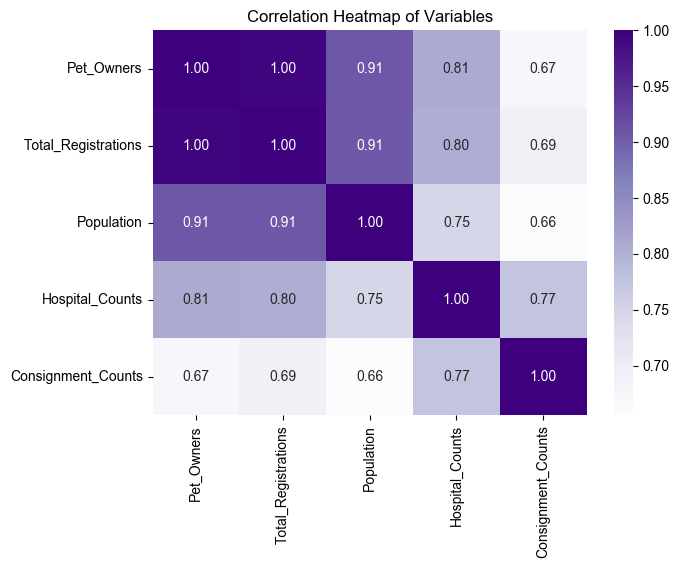

In [ ]:
# 변수 간의 상관관계 계산
correlation_matrix_1 = df_pairplot.corr()

# 히트맵 생성
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix_1, annot=True, cmap='Purples', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

<Figure size 1000x1000 with 0 Axes>

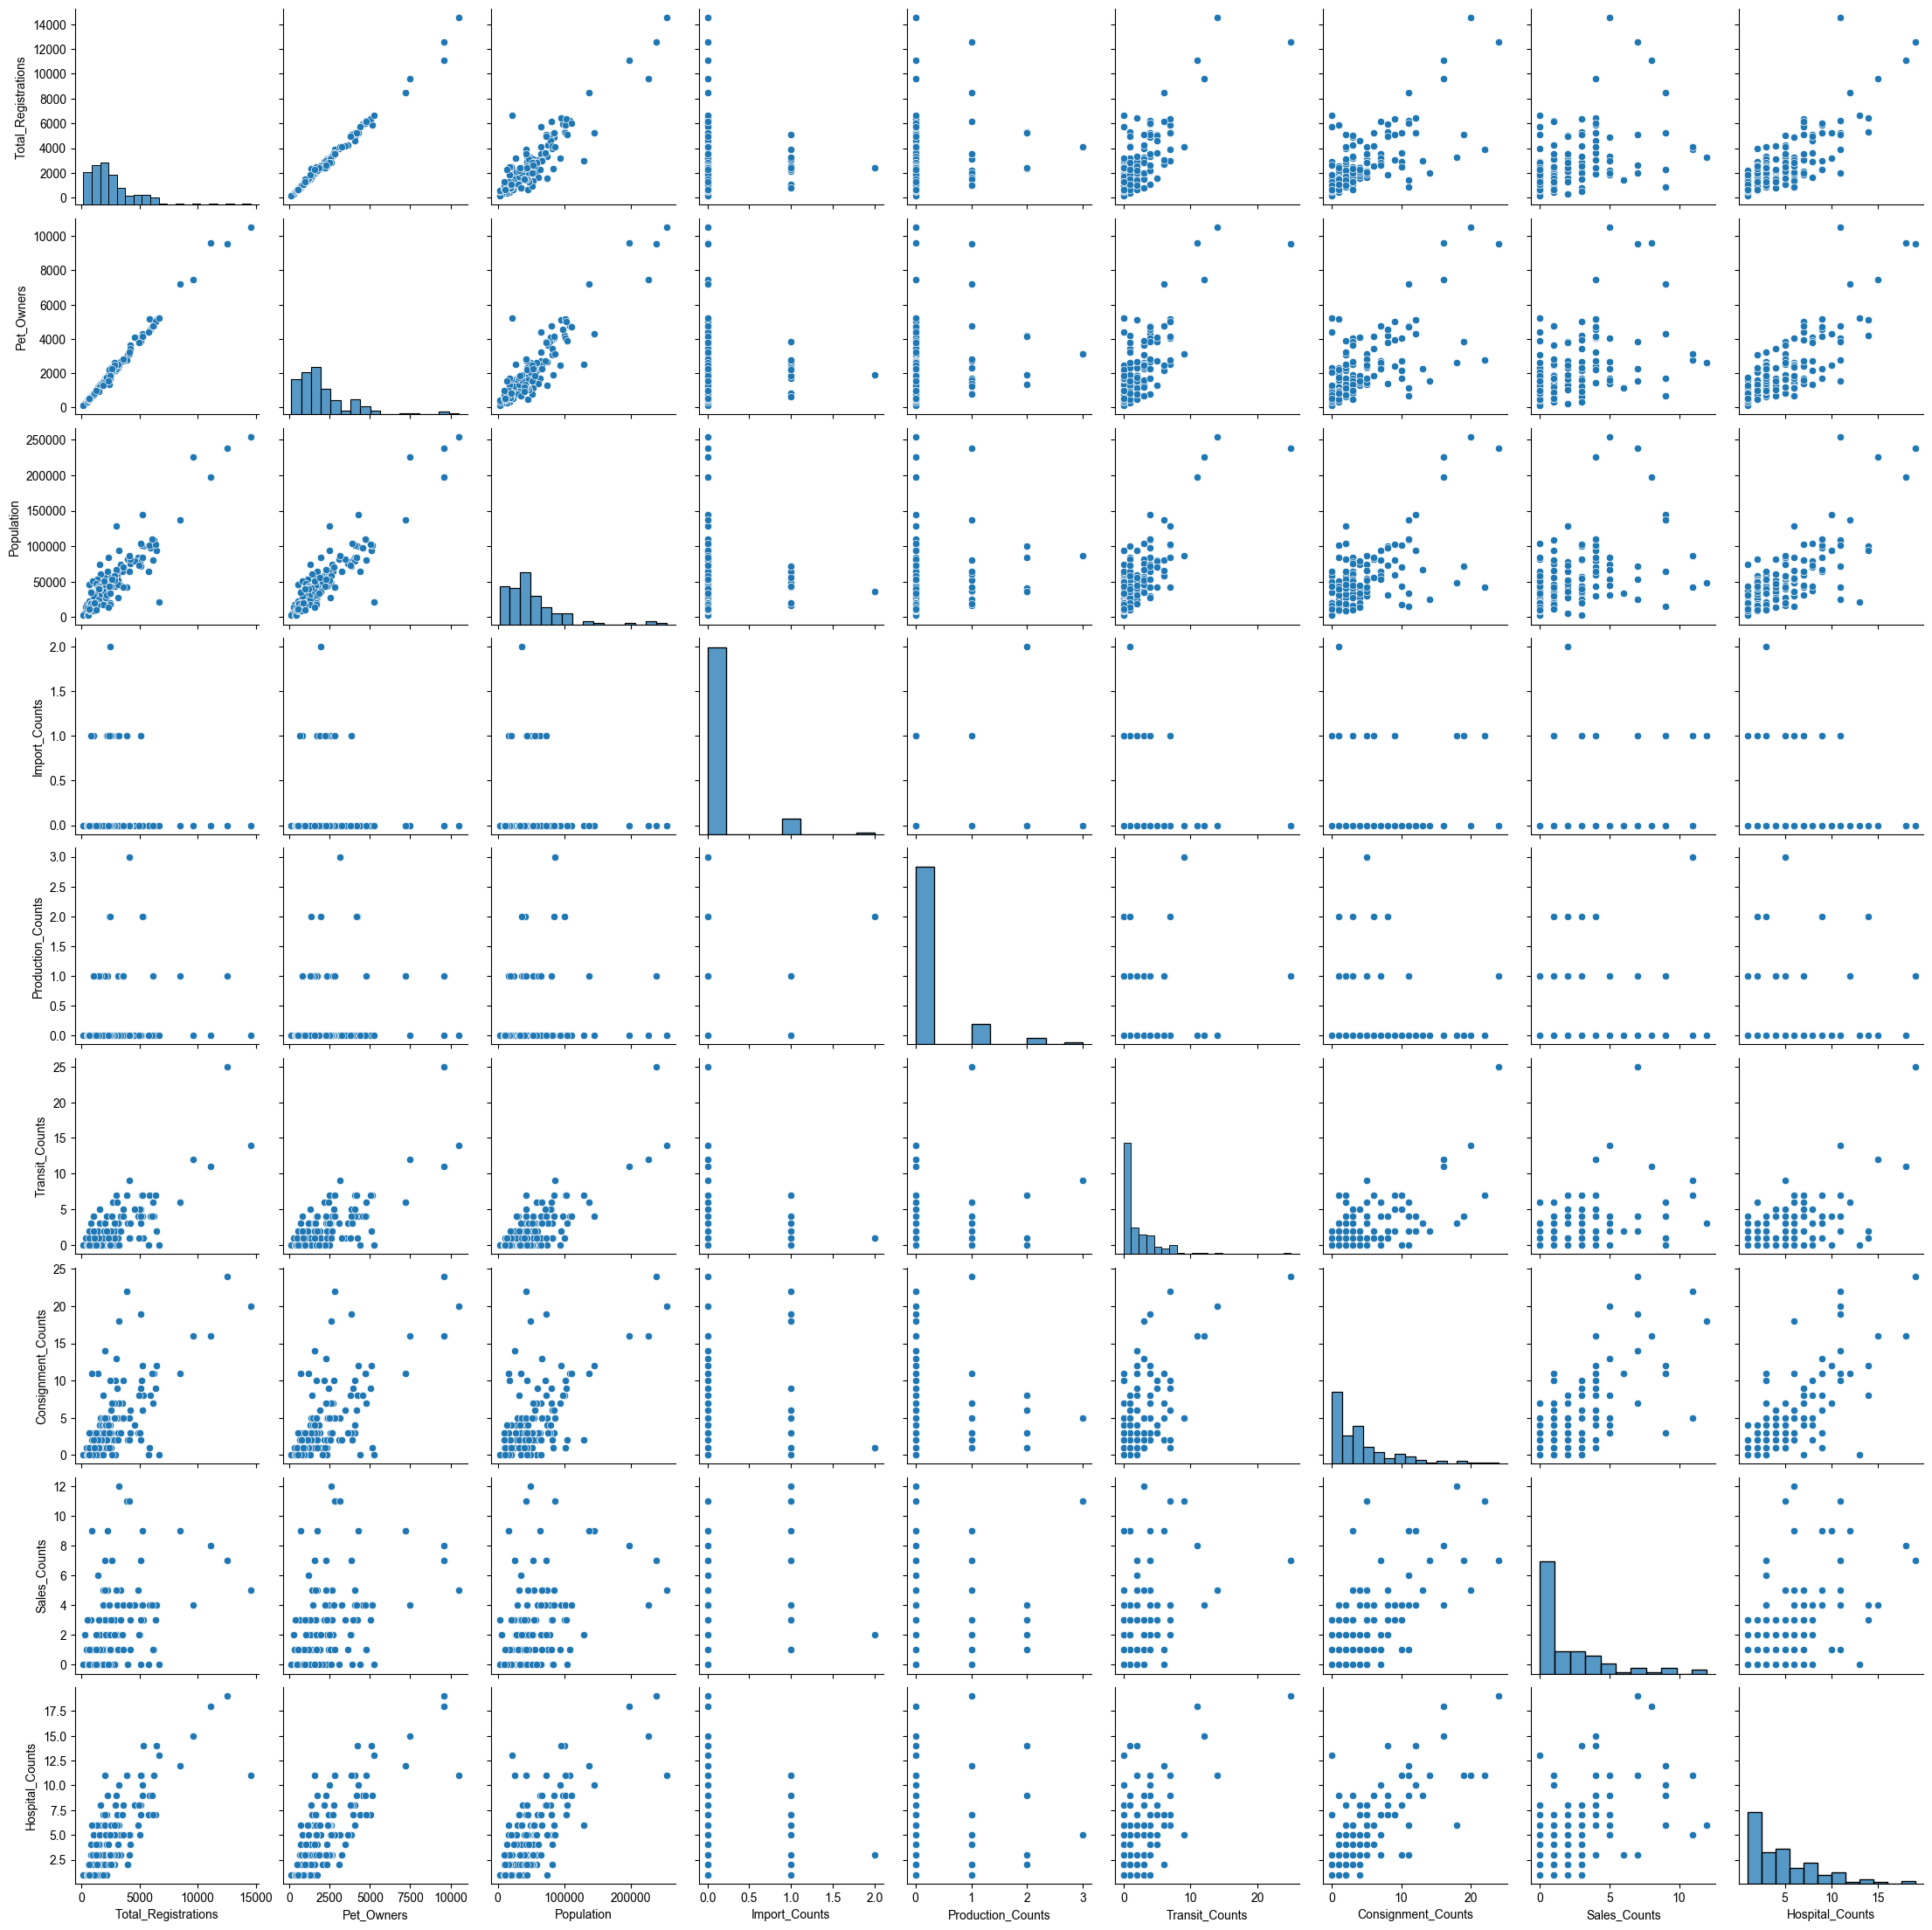

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pairplot_reversed = Seoul_Gu_Dong_Pet_Business_Population[['Total_Registrations', 'Pet_Owners', 'Population',
                                                              'Import_Counts', 'Production_Counts', 'Transit_Counts',
                                                              'Consignment_Counts', 'Sales_Counts', 'Hospital_Counts']]

plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Arial Unicode MS'
sns.pairplot(df_pairplot_reversed)
plt.show()

<Figure size 700x500 with 0 Axes>

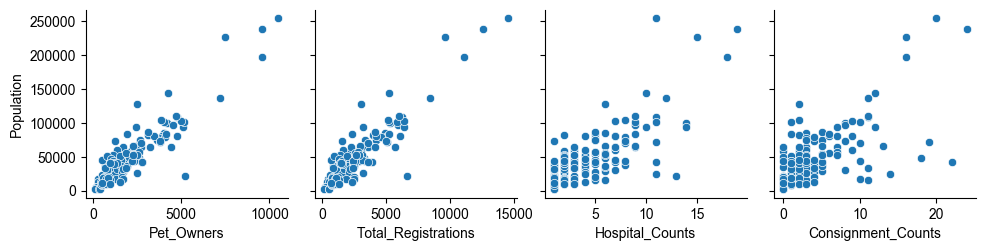

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pairplot = Seoul_Gu_Dong_Pet_Business_Population[['Pet_Owners', 'Total_Registrations', 'Population', 'Hospital_Counts', 'Consignment_Counts']]

plt.figure(figsize=(7, 5))
sns.pairplot(df_pairplot, x_vars=['Pet_Owners', 'Total_Registrations', 'Hospital_Counts', 'Consignment_Counts'], y_vars=['Population'])
plt.show()

<Figure size 1400x700 with 0 Axes>

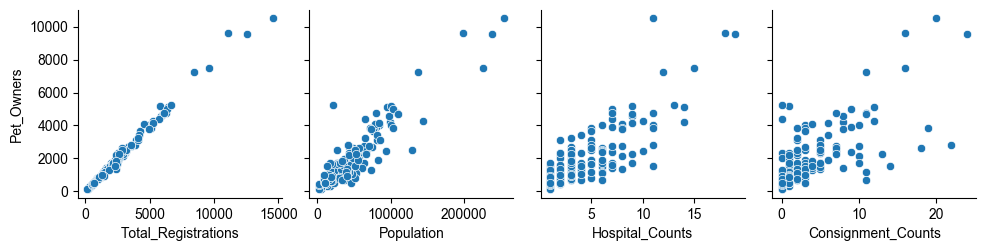

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df_pairplot_2 = Seoul_Gu_Dong_Pet_Business_Population[['Pet_Owners', 'Total_Registrations', 'Population', 'Hospital_Counts','Consignment_Counts']]

# 산점도 그래프 그리기
plt.figure(figsize=(14, 7))
sns.pairplot(df_pairplot_2, x_vars=['Total_Registrations', 'Population', 'Hospital_Counts', 'Consignment_Counts'], y_vars=['Pet_Owners'])
plt.show()

<Figure size 1400x700 with 0 Axes>

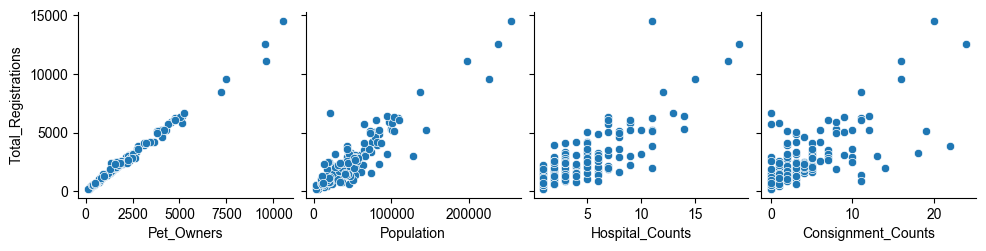

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df_pairplot_2 = Seoul_Gu_Dong_Pet_Business_Population[['Pet_Owners', 'Total_Registrations', 'Population', 'Hospital_Counts','Consignment_Counts']]

# 산점도 그래프 그리기
plt.figure(figsize=(14, 7))
sns.pairplot(df_pairplot_2, x_vars=['Pet_Owners', 'Population', 'Hospital_Counts', 'Consignment_Counts'], y_vars=['Total_Registrations'])
plt.show()

# matplotlib, Folium 

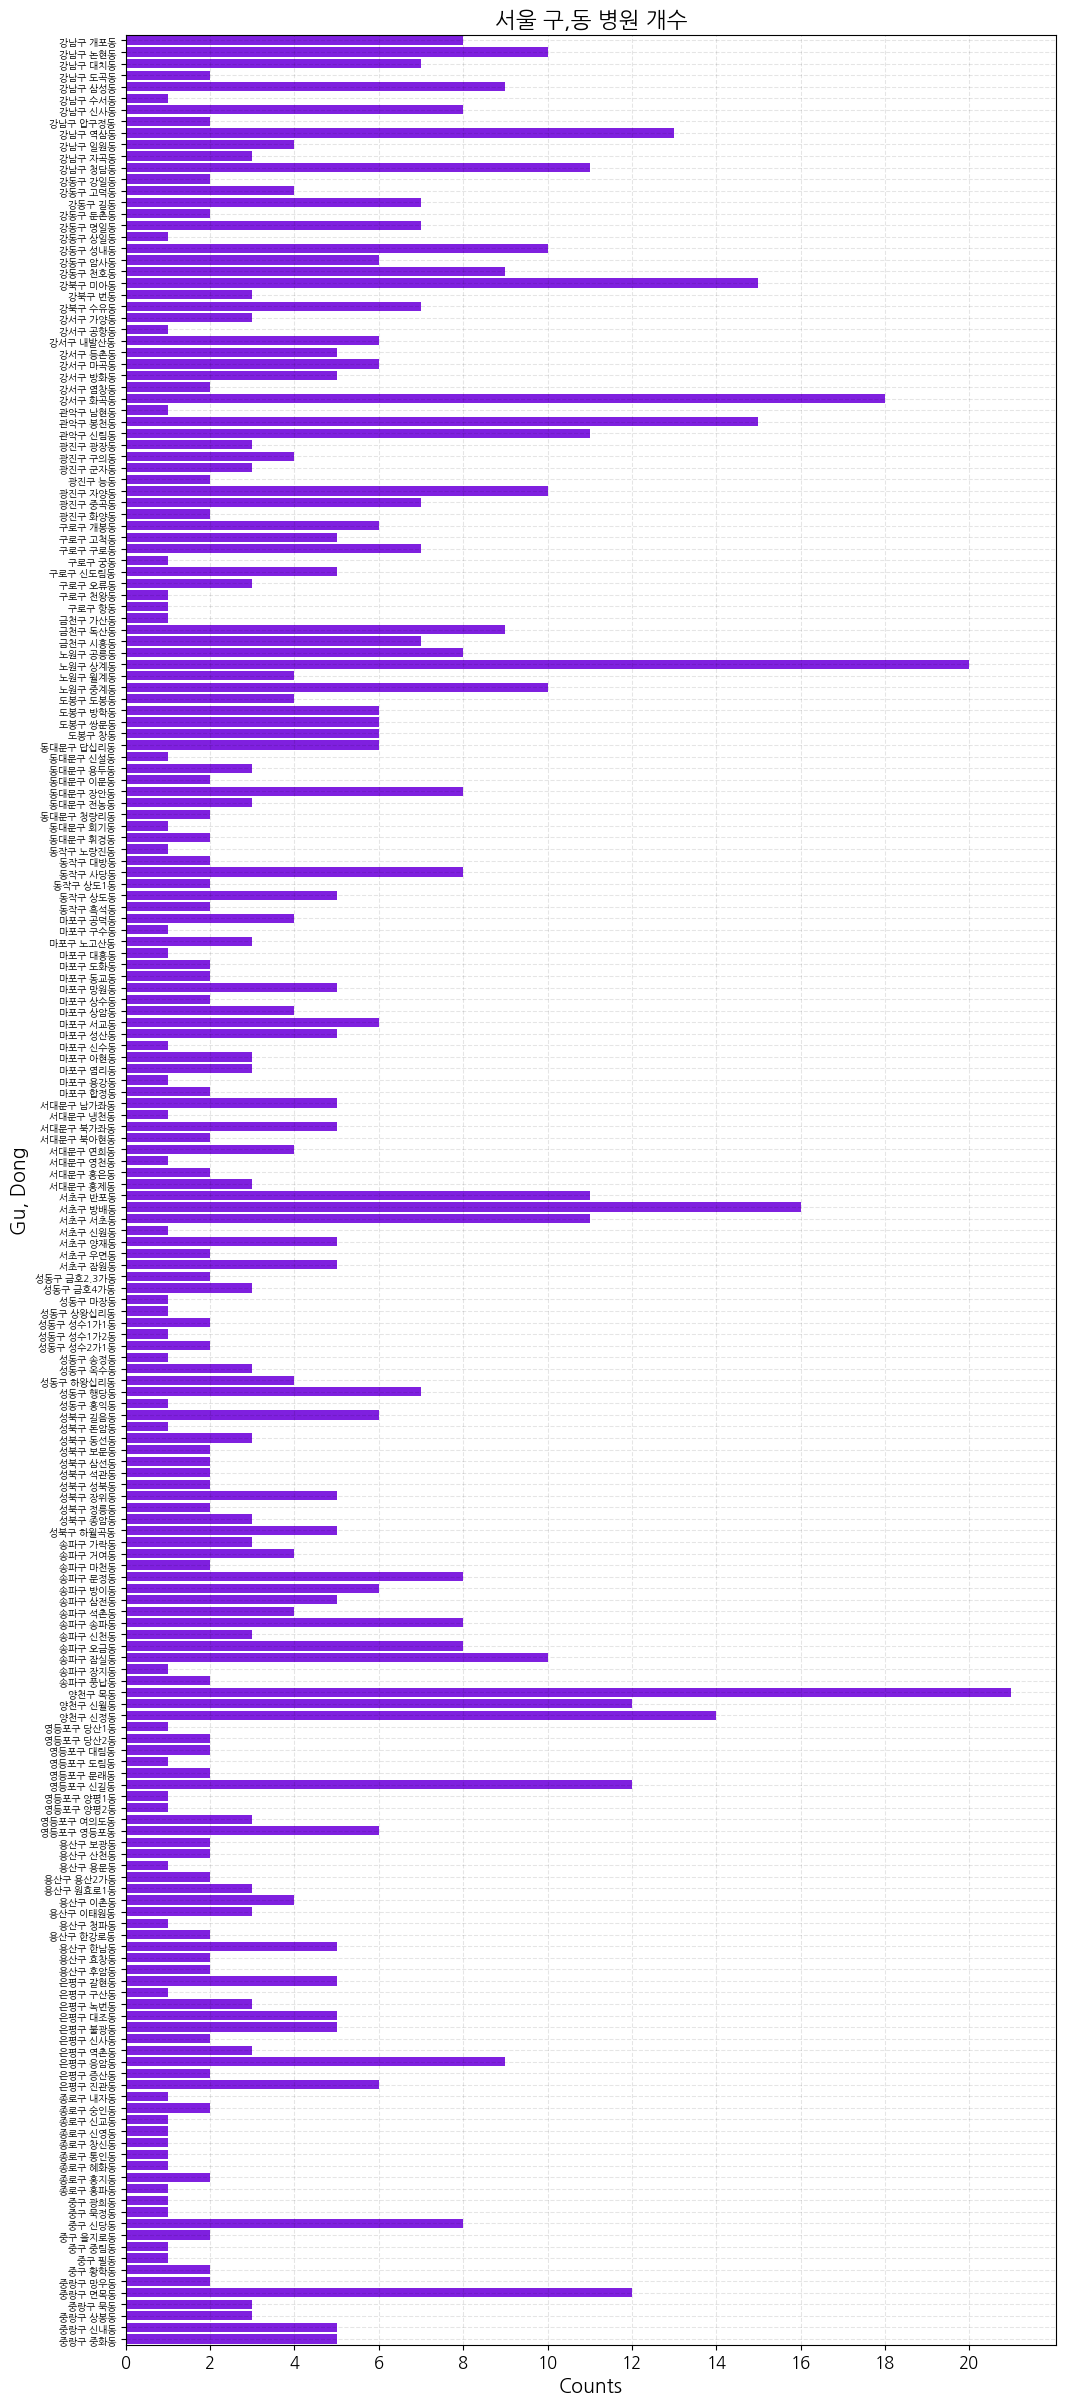

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 30), facecolor='white')
ax = sns.barplot(x=Animal_Hospital_Count['Counts'], y=Animal_Hospital_Count['Gu'] + ' ' + Animal_Hospital_Count['Dong'], color='#7f00ff')
plt.xticks(range(0, int(Animal_Hospital_Count['Counts'].max()) + 1, 2), fontsize=12)  # x 레이블 간격을 2로 설정

sns.set_style("whitegrid")
plt.xlabel('Counts', fontsize=14)  # x 레이블 설정
plt.yticks(fontsize= 7)
plt.ylabel('Gu, Dong', fontsize=14)  # y 레이블 설정
plt.title('서울 구,동 병원 개수', fontsize=16)
plt.grid(True, axis='both', linestyle='--', alpha=0.1, color='black')  # 가로 및 세로 그리드 추가, 투명도 및 점선 설정
plt.show()

#plt.savefig('서울 행정별 병원 개수.png')

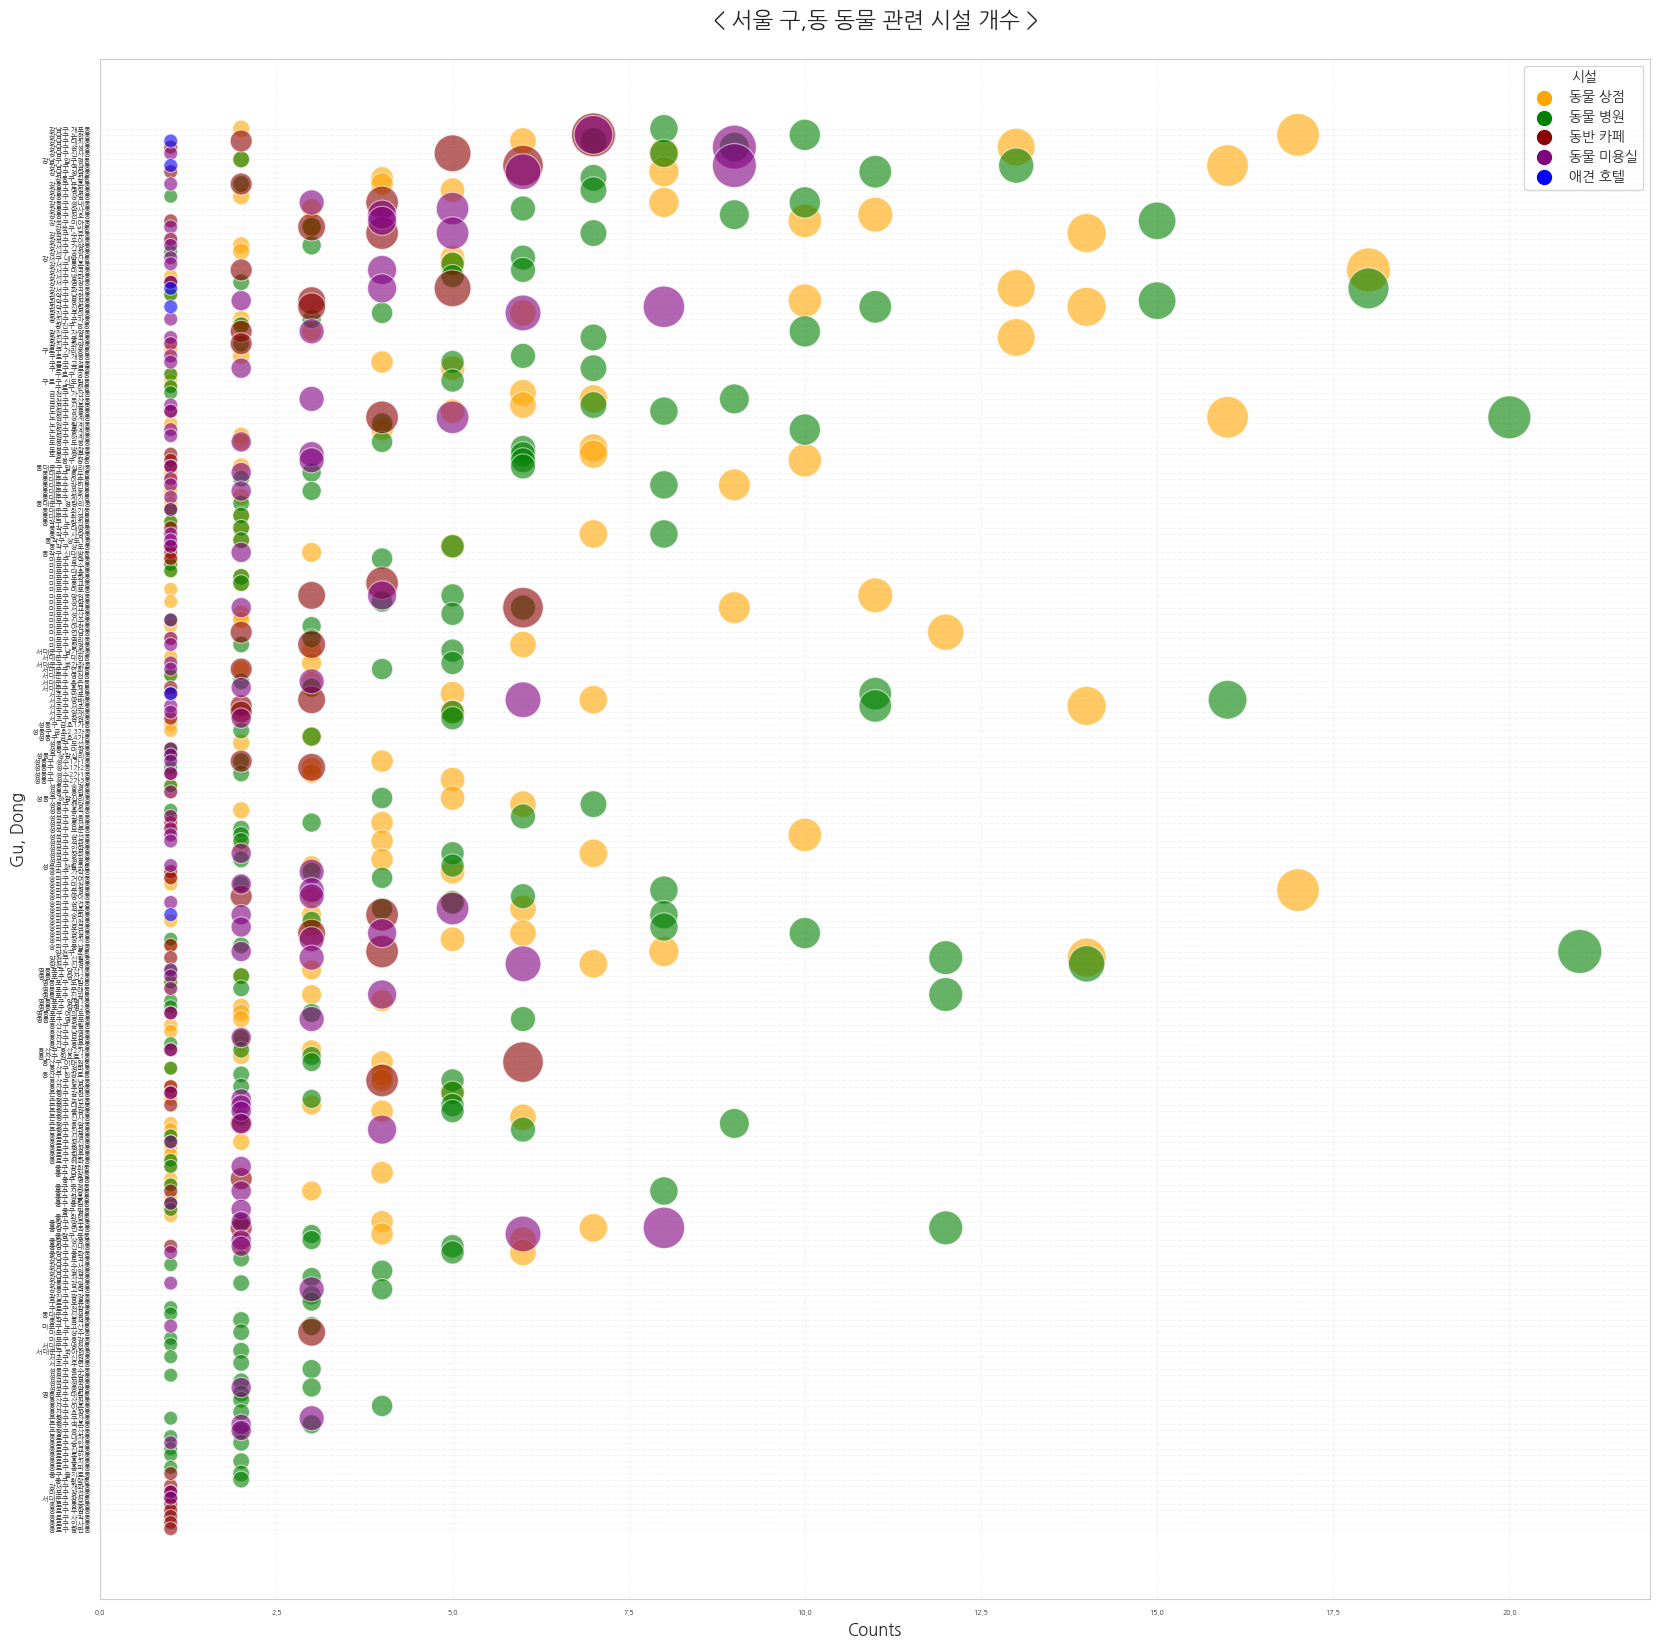

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

# 데이터프레임과 색상을 매핑하는 사전을 생성합니다.
dataframes = [Animal_Store_Count, Animal_Hospital_Count, Animal_Cafe_Count, Animal_beauty_Count, Animal_Hotel_Count]
colors = ['orange', 'green', 'darkred', 'purple', 'blue']
dataframe_colors = dict(zip(range(len(dataframes)), colors))
facility_names = ['동물 상점', '동물 병원', '동반 카페', '동물 미용실', '애견 호텔']

plt.figure(figsize=(20, 20))

# 각각의 Counts를 다른 색상 구/ 동 그룹화하여 표시합니다.
for idx, dataframe in enumerate(dataframes):
    ax = sns.scatterplot(x=dataframe['Counts'], y=dataframe['Gu'] + ' ' + dataframe['Dong'],
                         size=dataframe['Counts'], sizes=(100, 1000), color=dataframe_colors[idx], alpha=0.6)

plt.xticks(fontsize=5)
plt.xlabel('Counts', fontsize=12)  # x 레이블
plt.yticks(fontsize=5)
plt.ylabel('Gu, Dong', fontsize= 12)  # y 레이블
plt.title('< 서울 구,동 동물 관련 시설 개수 >\n', fontsize=16)
plt.grid(True, axis='both', linestyle='--', alpha=0.2)  # 그리드, 투명도 및 점선 설정

# 레전드에 현재 시설별 표시를 추가합니다.
legend_handles = [plt.scatter([], [], s=100, color=colors[i], label=facility_names[i]) for i in range(len(colors))]
plt.legend(handles=legend_handles, title='시설', loc='upper right', fontsize=10)

plt.show()

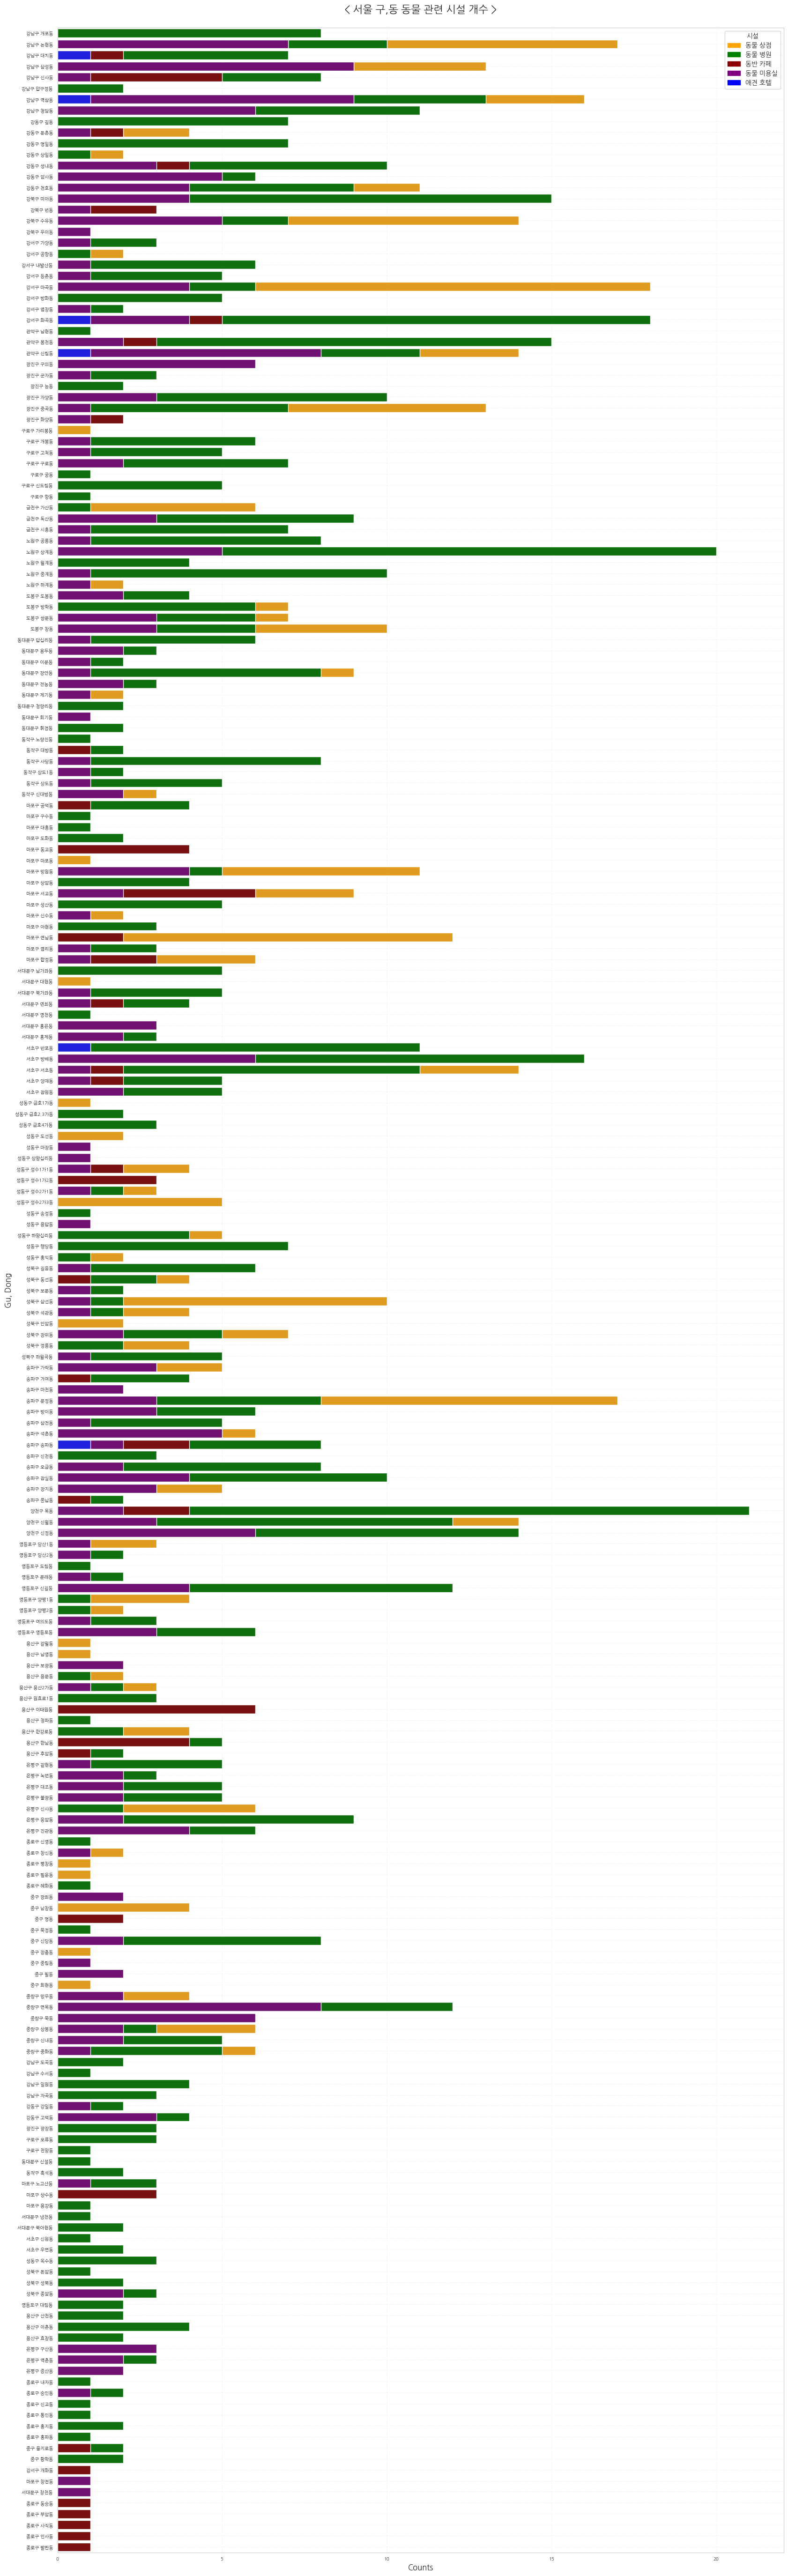

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

# 데이터프레임과 색상을 매핑하는 사전을 생성합니다.
dataframes = [Animal_Store_Count, Animal_Hospital_Count , Animal_Cafe_Count, Animal_beauty_Count, Animal_Hotel_Count ]
colors = ['orange','green','darkred','purple', 'blue']
dataframe_colors = dict(zip(range(len(dataframes)), colors))
facility_names = [ '동물 상점','동물 병원','동반 카페' ,'동물 미용실', '애견 호텔']

plt.figure(figsize=(20, 70))

# 각각의 Counts를 다른 색상 구/ 동 그룹화하여 표시합니다.
legend_labels = []
for idx, dataframe in enumerate(dataframes):
    ax = sns.barplot(x=dataframe['Counts'], y=dataframe['Gu'] + ' ' + dataframe['Dong'], color=dataframe_colors[idx])
    legend_labels.append(dataframe.index.name)

plt.xticks(range(0, max(max(df['Counts']) for df in dataframes) + 1, 5), fontsize=7)  # 간격 5
plt.xlabel('Counts', fontsize= 12)  # x 레이블 
plt.yticks(fontsize=7)
plt.ylabel('Gu, Dong', fontsize= 12)  # y 레이블 
plt.title('< 서울 구,동 동물 관련 시설 개수 >\n', fontsize=16)
plt.grid(True, axis='both', linestyle='--', alpha=0.2)  # 그리드 , 투명도 및 점선 설정

# 레전드에 현재 시설별 표시를 추가합니다.
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, facility_names, title='시설', loc='upper right', fontsize=10)

#plt.show()
#plt.savefig('서울 동물 관련 시설.png')

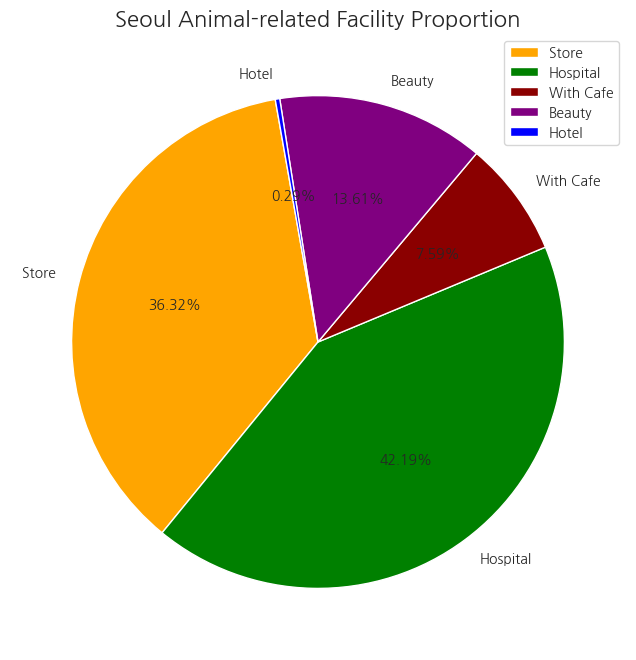

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

# 데이터프레임과 색상을 매핑하는 사전을 생성합니다.
dataframes = [Animal_Store_Count, Animal_Hospital_Count, Animal_Cafe_Count, Animal_beauty_Count, Animal_Hotel_Count]
colors = ['orange', 'green', 'darkred', 'purple', 'blue']
dataframe_colors = dict(zip(range(len(dataframes)), colors))
facility_names = ['Store', 'Hospital', 'With Cafe', 'Beauty', 'Hotel']

total_counts = [df['Counts'].sum() for df in dataframes]

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=facility_names, colors=colors, autopct='%1.2f%%', startangle=100) 

# 그래프 꾸미기
plt.title('Seoul Animal-related Facility Proportion', fontsize=16) 

# 그래프 보여주기
plt.legend(loc='upper right')  # 범례를 중앙에 위치시킵니다.
#plt.show()
#plt.savefig('서울 관련 시설 비중.png')

In [ ]:
Animal_Store_Count['Counts'].sum()+ Animal_Hospital_Count['Counts'].sum()+Animal_Cafe_Count['Counts'].sum()+Animal_beauty_Count['Counts'].sum()+Animal_Hotel_Count['Counts'].sum()

2043

In [ ]:
import folium
from folium.plugins import MarkerCluster
import requests
import json

def add_markers_to_cluster(dataframe, marker_cluster, color):
    for index, row in dataframe.iterrows():
        popup = folium.Popup(row['Gu'] + ' ' + row['Dong'] + ' ' + row['Category3'] + ': ' + str(row['Counts']), max_width=200)
        folium.Marker(location=[row['Y'], row['X']],
                      popup=popup,
                      icon=folium.Icon(color=color)).add_to(marker_cluster)

# CartoDB dark_matter cartodbpositron 둘 중 하나가 적합해 보임.
map_folium = folium.Map(location=[37.5665, 126.9780], zoom_start=15, tiles='CartoDB dark_matter', zoom_control=False)


# 마커 클러스터 생성
marker_cluster = MarkerCluster().add_to(map_folium)

# 각 카테고리에 대해 마커 추가
add_markers_to_cluster(Animal_Cafe_Count, marker_cluster, 'darkred')
add_markers_to_cluster(Animal_Hospital_Count, marker_cluster, 'green')
add_markers_to_cluster(Animal_beauty_Count, marker_cluster, 'purple')
add_markers_to_cluster(Animal_Store_Count, marker_cluster, 'orange')
add_markers_to_cluster(Animal_Hotel_Count, marker_cluster, 'blue')

# 범례 추가
legend_html = '''
     <div style="position: fixed; 
                 top: 30px;
                 right: 10px; 
                 width: 200px;
                 height: 130px; 
                 border:3px solid grey;
                 z-index:9999; 
                 font-size:12px;
                 background-color:white;
                 opacity: 0.7;
                 padding: 10px;">
     <b>범례</b><br>
     <hr style="margin: 2px;">
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="darkred"/>
     </svg>
     &nbsp;애완 카페<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="green"/>
     </svg>
     &nbsp;동물 병원<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="purple"/>
     </svg>
     &nbsp;미용실<br>
     <svg height="15" width="15">
       <circle cx="7.5" cy="7.5" r="6" fill="orange"/>
     </svg>
     &nbsp;애완동물 용품점<br>
     <svg height="15" width="15">
     <circle cx="7.5" cy="7.5" r="6" fill="blue"/>
     </svg>
     &nbsp;애견 호텔<br>
     <svg height="15" width="15">
      </div>
     '''

legend_music = ''' 
<!DOCTYPE html>
<html lang="ko">
    <head>
        <meta charset="UTF-8" />
        <title>음악 재생</title>
        <script src="http://cdnjs.cloudflare.com/ajax/libs/tone/14.8.49/Tone.min.js"></script>
    </head>
    <body>
        <button id="playButton">재생</button>
        <button id="stopButton">중지</button>

        <script>
            const playButton = document.getElementById('playButton');
            const stopButton = document.getElementById('stopButton');

            let isPlaying = false;

            playButton.addEventListener('click', async () => {
                if (!isPlaying) {
                    await Tone.start();
                    Tone.Transport.start();
                    isPlaying = true;
                }
            });

            stopButton.addEventListener('click', () => {
                Tone.Transport.stop();
                isPlaying = false;
            });

            const drum = new Tone.MembraneSynth().toDestination();
            const hat = new Tone.MetalSynth({
                envelope: {
                    attack: 0.01,
                    decay: 0.1,
                    release: 0.3,
                },
            }).toDestination();
            hat.volume.value = -20;

            new Tone.Loop((t) => {
                drum.triggerAttackRelease('C1', '8n', t);
                drum.triggerAttackRelease('C1', '8n', t + 0.5);
                drum.triggerAttackRelease('C1', '8n', t + 1);
                drum.triggerAttackRelease('C1', '8n', t + 1.5);
                hat.triggerAttackRelease('C1', '8n', t + 1.73);
                hat.triggerAttackRelease('C1', '8n', t + 1.86);
            }, 2).start(0);
            drum.volume.value = -20;

            const effect = new Tone.Reverb(3).toDestination();
            const effect2 = new Tone.FrequencyShifter(4).toDestination();

            const melody = new Tone.PolySynth().toDestination();
            melody
                .set({
                    volume: -25,
                    oscillator: { type: 'sawtooth' },
                    envelope: {
                        attack: 0.01,
                        decay: 0.1,
                        release: 5,
                    },
                })
                .connect(effect2)
                .connect(effect);

            new Tone.Loop((t) => {
                melody.triggerAttackRelease(['C2', 'C4'], '8n', t);
                melody.triggerAttackRelease('E4', '16n', t + 0.4);
                melody.triggerAttackRelease('F4', '16n', t + 0.8);
                melody.triggerAttackRelease('E4', '16n', t + 1.28);
                
            }, 2).start(0);

            
        </script>
    </body>
</html>




'''

map_folium.get_root().html.add_child(folium.Element(legend_html))
map_folium.get_root().html.add_child(folium.Element(legend_music))

# 서울 행정구역 정보 추가
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
seoul_geo = r.json()

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(map_folium)


#map_folium.save('test_music1.html')